In [1]:
import numpy as np
import sympy as sy
import matplotlib.cm as cm
import matplotlib.pylab as plt
from PIL import Image
import warnings
import time
import os

warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 30
from IPython.display import display, Math

## $$\text{Cat Map : Arnold Diffusion}$$

$\qquad \begin{align} x_{n+1} &= (x_n + y_n)  \\ y_{n+1} &= (x_n + 2y_n)  \end{align} \mod 1$

In [2]:
def arnold_cat_map_discrete(u, v, size, matrix):
    coords = np.array([u, v])
    transformed_coords = np.dot(matrix, coords) % size
    return transformed_coords[0], transformed_coords[1]

def apply_transformation_discrete(image, num_iterations, matrix):
    width, height = image.size
    pixels = np.array(image)
    size = width           # Assuming width == height for a square image
    transformed_image = np.zeros_like(pixels)
    for _ in range(num_iterations):
        new_pixels = np.zeros_like(pixels)
        for i in range(width):
            for j in range(height):
                u, v = i, j
                u_new, v_new = arnold_cat_map_discrete(u, v, size, matrix)
                new_pixels[v_new, u_new] = pixels[j, i]
        pixels = new_pixels
        transformed_image = pixels
    return transformed_image

$\qquad C = \begin{bmatrix} 1 &  1  \\ 1 & 2 \end{bmatrix}$

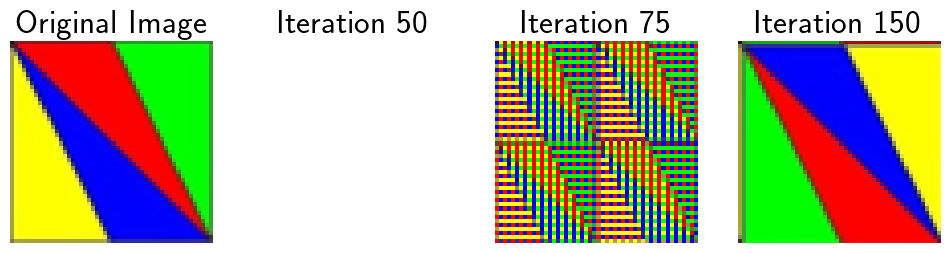

In [3]:
image_path = 'square.png'
image = Image.open(image_path)  
image = image.resize((50, 50))               # Resize to 50x50 if needed
iterations = [0, 50, 75, 150]
matrix = np.array([[1, 1], [1, 2]])
transformed_images = [apply_transformation_discrete(image, i, matrix) for i in iterations]

fig, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()  
axs[0].imshow(np.array(image))
axs[0].set_title('Original Image')
axs[0].axis('off')

for i, iteration in enumerate(iterations[1:]):
    axs[i+1].imshow(transformed_images[i])
    axs[i+1].set_title(f'Iteration {iteration}')
    axs[i+1].axis('off')
plt.show()

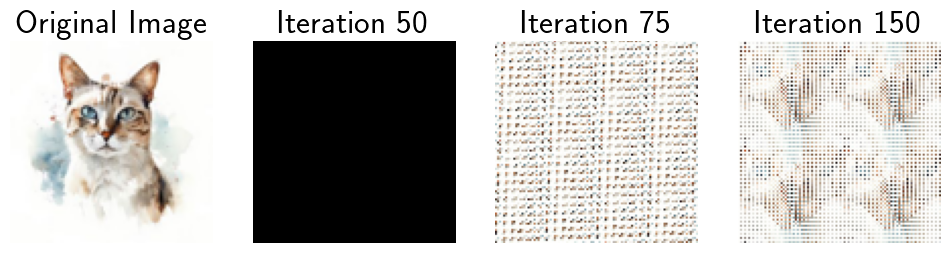

In [4]:
image_path = 'cat.jpg'
image = Image.open(image_path)  
image = image.resize((100, 100))               # Resize to 50x50 if needed
iterations = [0, 50, 75, 150]
matrix = np.array([[1, 1], [1, 2]])
transformed_images = [apply_transformation_discrete(image, i, matrix) for i in iterations]

fig, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()  
axs[0].imshow(np.array(image))
axs[0].set_title('Original Image')
axs[0].axis('off')

for i, iteration in enumerate(iterations[1:]):
    axs[i+1].imshow(transformed_images[i])
    axs[i+1].set_title(f'Iteration {iteration}')
    axs[i+1].axis('off')
plt.show()

$\qquad C = \begin{bmatrix} 2 & 1 \\ 1 & 1 \end{bmatrix}$

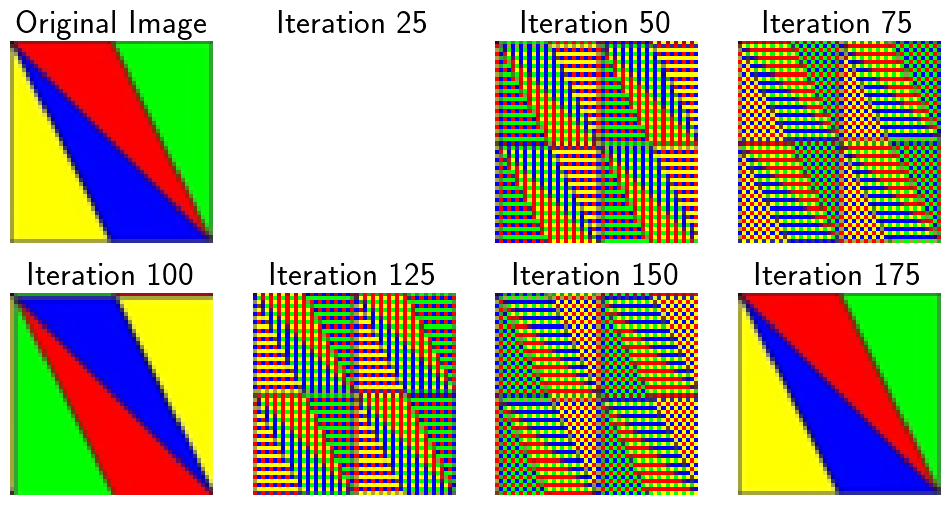

In [5]:
image_path = 'square.png'
image = Image.open(image_path)
image = image.resize((50, 50))               # Resize to 50x50 if needed
iterations = [0, 25, 50, 75, 100, 125, 150, 175]
matrix = np.array([[2, 1], [1, 1]])
transformed_images = [apply_transformation_discrete(image, i, matrix) for i in iterations]

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten()  
axs[0].imshow(np.array(image))
axs[0].set_title('Original Image')
axs[0].axis('off')

for i, iteration in enumerate(iterations[1:]):
    axs[i+1].imshow(transformed_images[i])
    axs[i+1].set_title(f'Iteration {iteration}')
    axs[i+1].axis('off')
plt.show()

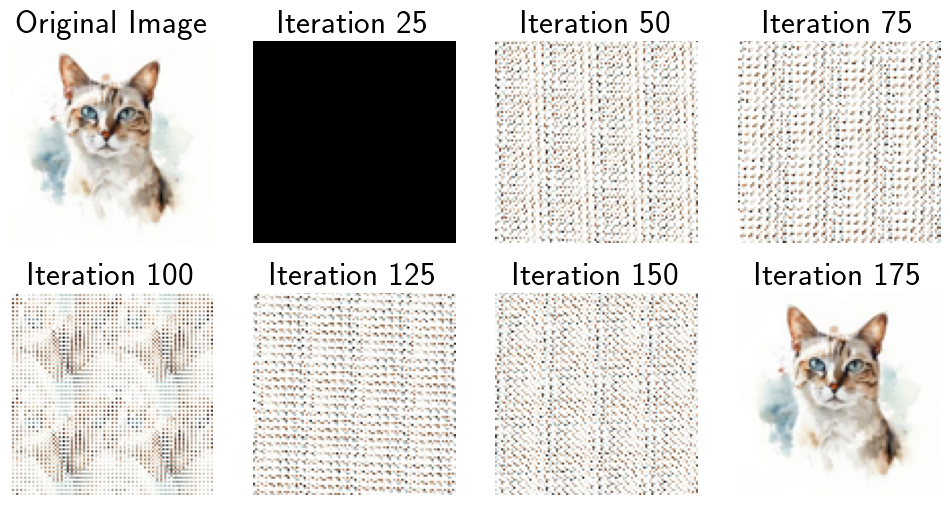

In [6]:
image_path = 'cat.jpg'
image = Image.open(image_path)
image = image.resize((100, 100))               # Resize to 50x50 if needed
iterations = [0, 25, 50, 75, 100, 125, 150, 175]
matrix = np.array([[2, 1], [1, 1]])
transformed_images = [apply_transformation_discrete(image, i, matrix) for i in iterations]

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten()  
axs[0].imshow(np.array(image))
axs[0].set_title('Original Image')
axs[0].axis('off')

for i, iteration in enumerate(iterations[1:]):
    axs[i+1].imshow(transformed_images[i])
    axs[i+1].set_title(f'Iteration {iteration}')
    axs[i+1].axis('off')
plt.show()

## $$\text{The Baker's Map}$$ 

$ \qquad \begin{equation*} (x_n, y_n) = \left\{\begin{array}{rl} (2x_n, ay_n) & \text{for } 0\le x_n\le \frac{1}{2},\\ (2x_n-1, ay_n+\frac{1}{2}) & \text{for } \frac{1}{2}\le x_n\le 1.\end{array} \right. \\ \qquad\qquad\text{where } 0<a\le\frac{1}{2} \end{equation*} $ 

In [2]:
def bakers_map(x,y, a):

    if 0 <= x <= 0.5:
        return 2 * x, a * y
    else:
        return 2 * x - 1, a * y + 0.5

In [3]:
def iterate_bakers_map(n, a, points):
    x_vals = [point[0] for point in points]
    y_vals = [point[1] for point in points]
    
    for _ in range(n):
        new_points = []
        for x, y in zip(x_vals, y_vals):
            x_new, y_new = bakers_map(x, y, a)
            new_points.append((x_new, y_new))
        x_vals, y_vals = zip(*new_points)
    return x_vals, y_vals

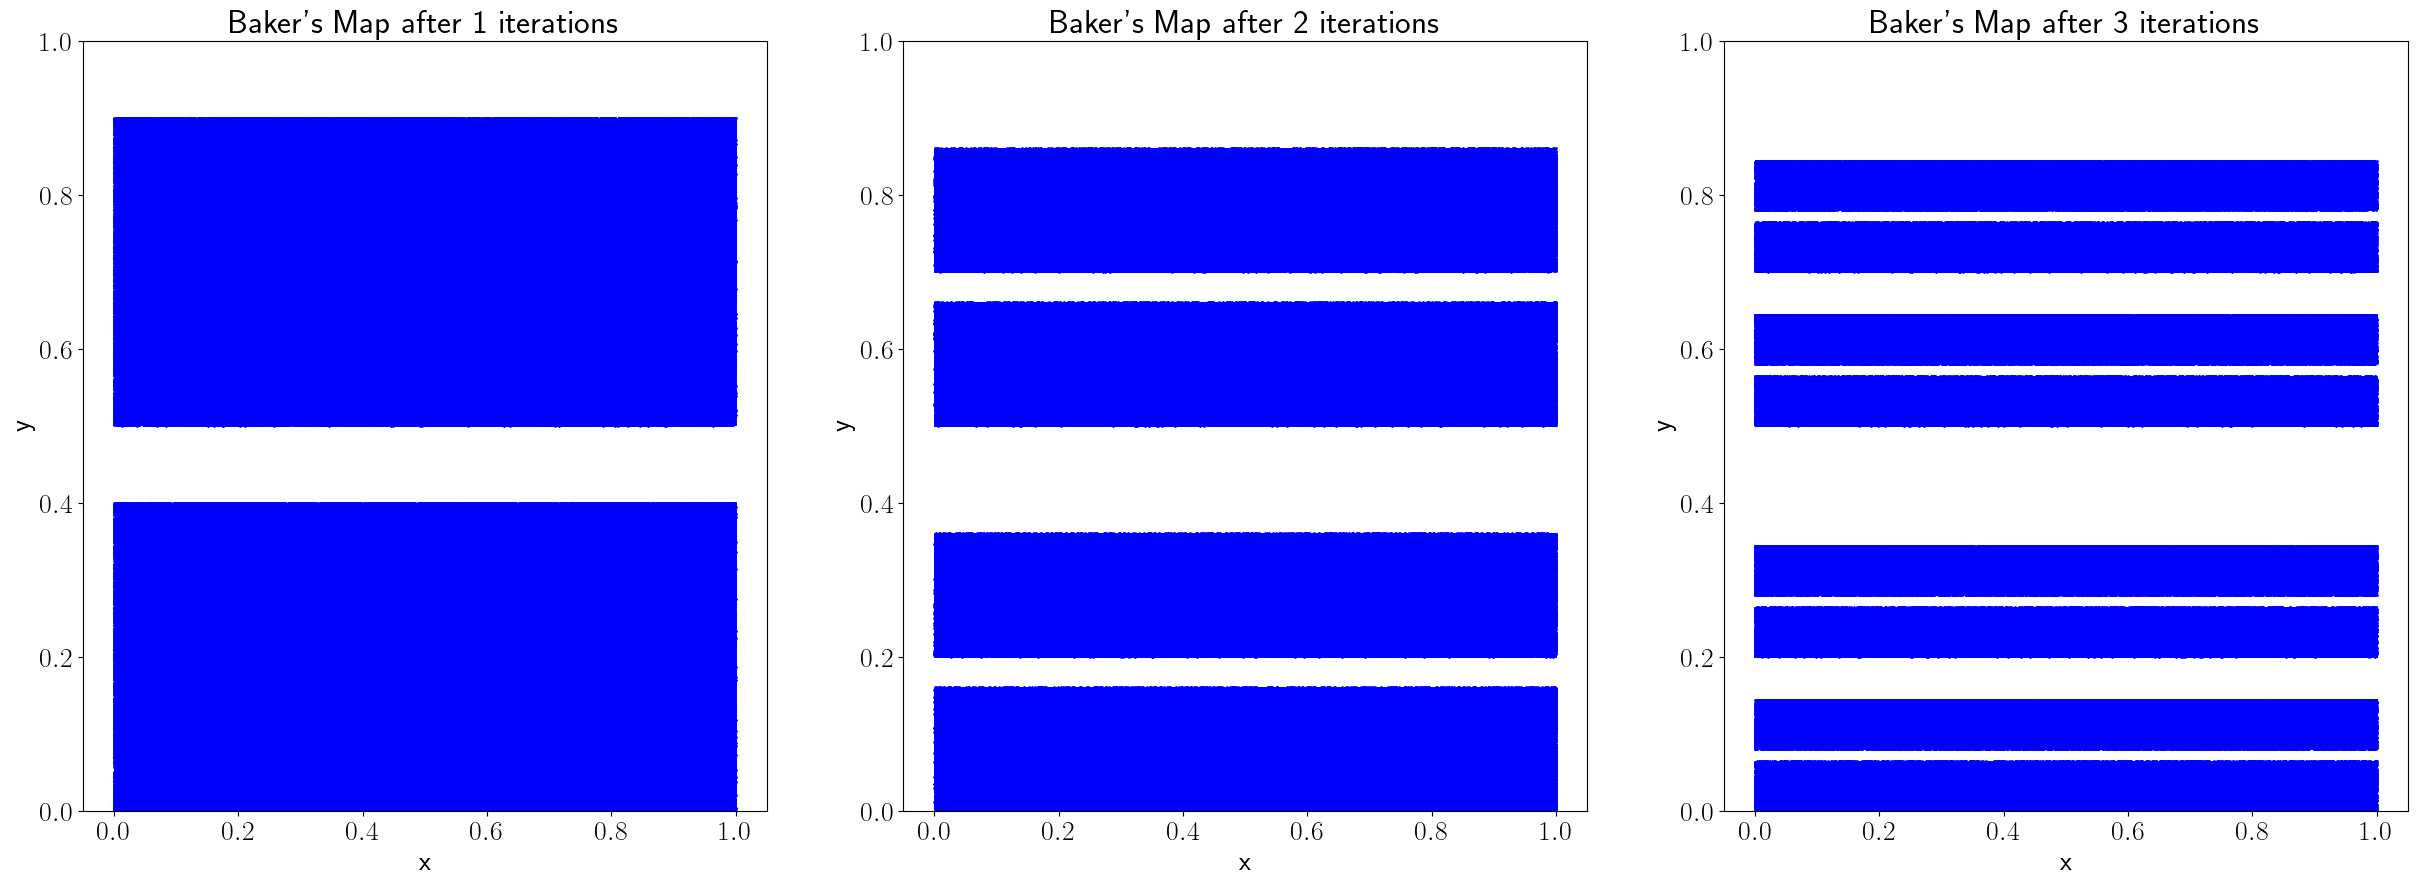

In [9]:
num_points = 1000000
points = np.random.rand(num_points, 2)
a = 0.4
iterations = [1,2,3]

fig, ax = plt.subplots(1, len(iterations), figsize=(30, 10))
for i, iterations in enumerate(iterations):
    x_vals, y_vals = iterate_bakers_map(iterations, a, points)
    ax[i].scatter(x_vals, y_vals, s=1, color='blue')
    ax[i].set_title("Baker's Map after {} iterations".format(iterations))
    ax[i].set_ylim(0,1)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
plt.show()

Study the baker’s map on a computer for the case $a = \frac{1}{2}.$                                                              
Starting from a random initial condition, plot the first ten iterates and label them.

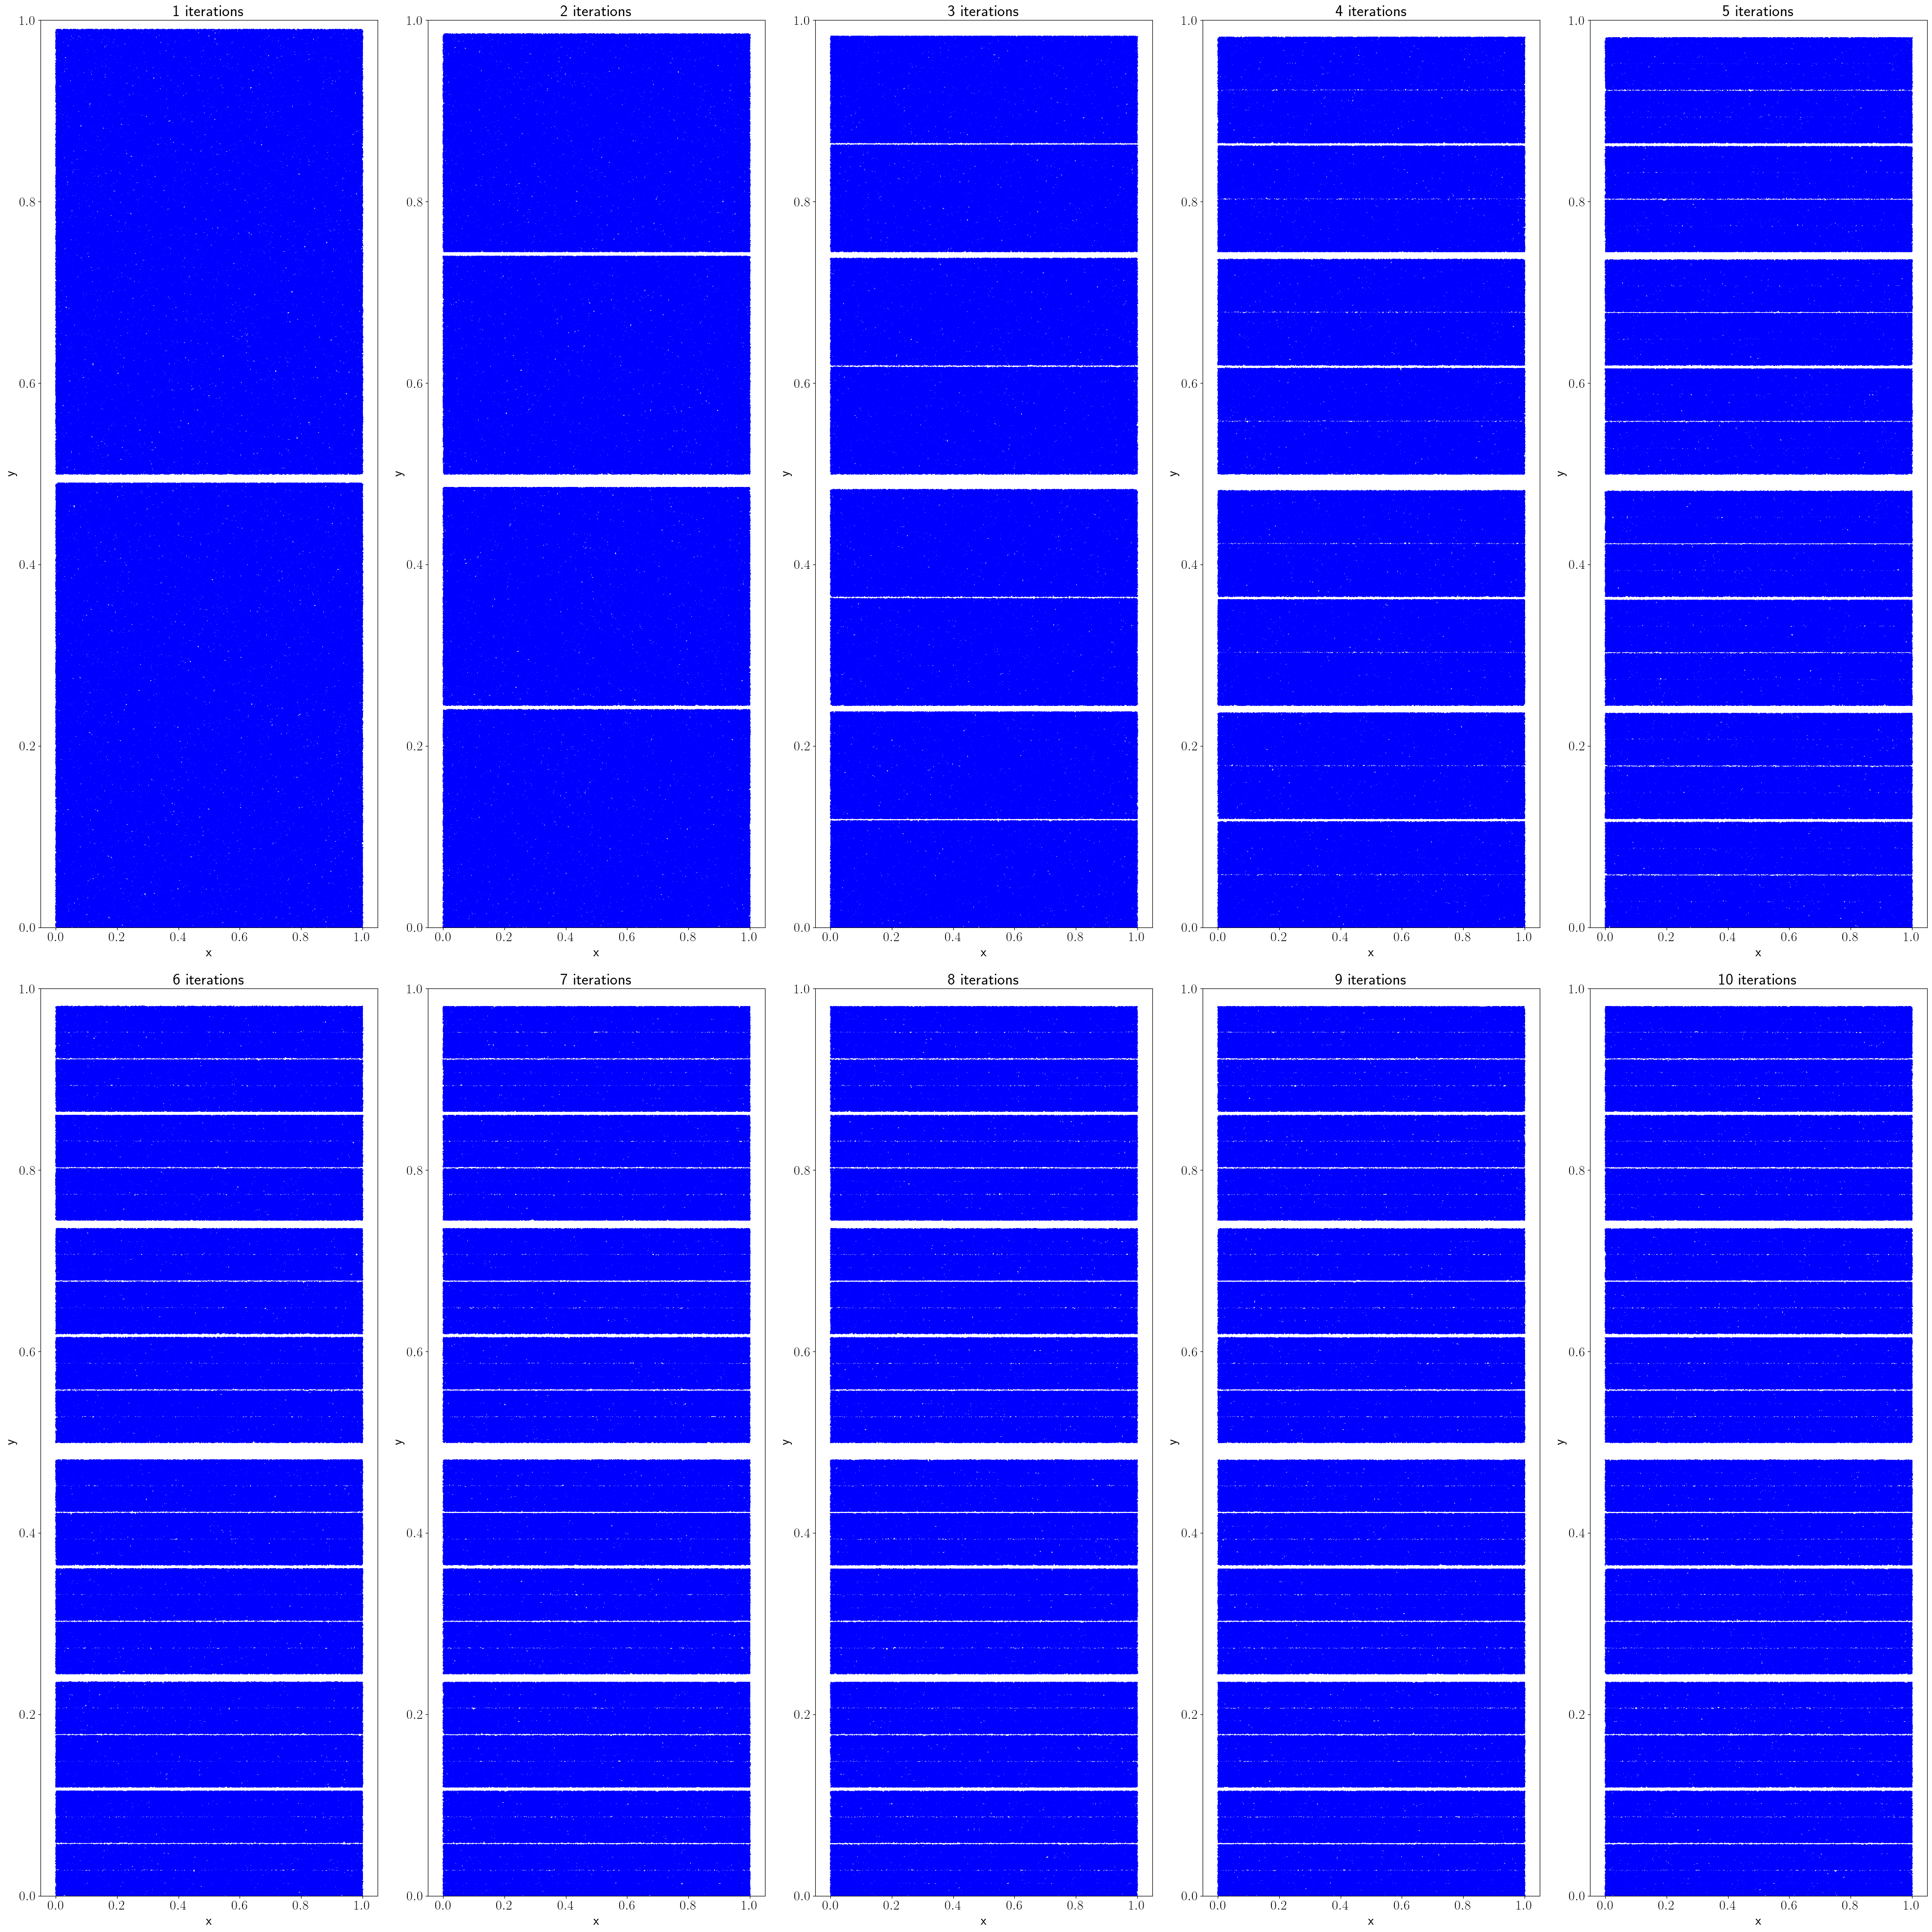

In [12]:
num_points = 1000000
points = np.random.rand(num_points, 2)
a = 0.49
iterations_list = [1,2,3,4,5,6,7,8,9,10]

fig, axes = plt.subplots(2, 5, figsize=(40, 40))
for i, iterations in enumerate(iterations_list):
    x_transformed, y_transformed = iterate_bakers_map(iterations, a, points)
    ax = axes[i // 5, i % 5]  # Access the correct subplot
    ax.scatter(x_transformed, y_transformed, s=1, color='blue')
    ax.set_title(f"{iterations} iterations")
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
plt.tight_layout()
plt.show()

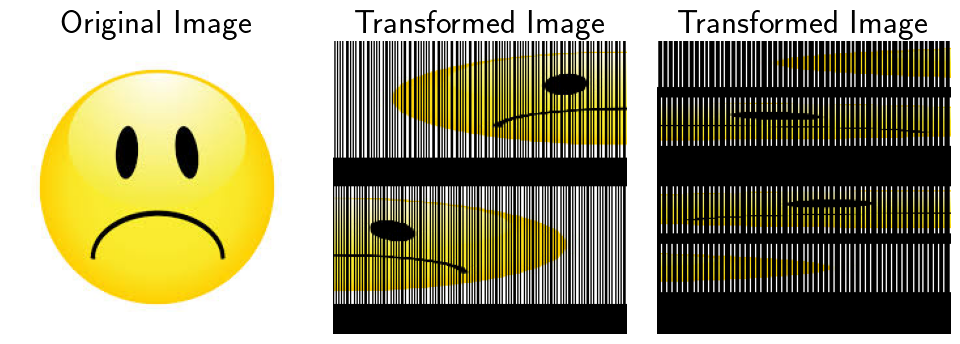

In [11]:
def transform_image(image_path, a, iterations):
    # Load the image
    image = Image.open(image_path)
    image = image.convert('RGB')  # Ensure the image is in RGB format
    width, height = image.size
    
    # Normalize the pixel coordinates to the unit square
    x_vals, y_vals = np.meshgrid(np.linspace(0, 1, width), np.linspace(0, 1, height))
    x_vals = x_vals.flatten()
    y_vals = y_vals.flatten()
    
    # Apply the Baker's Map iterations
    for _ in range(iterations):
        new_x_vals, new_y_vals = [], []
        for x, y in zip(x_vals, y_vals):
            x_new, y_new = bakers_map(x, y, a)
            new_x_vals.append(x_new)
            new_y_vals.append(y_new)
        x_vals = np.array(new_x_vals)
        y_vals = np.array(new_y_vals)
    
    # Map the transformed coordinates back to pixel values
    x_vals = (x_vals * (width - 1)).astype(int)
    y_vals = (y_vals * (height - 1)).astype(int)
    
    # Create the transformed image
    transformed_image = Image.new('RGB', (width, height))
    pixels = transformed_image.load()
    
    original_pixels = image.load()
    for i in range(width):
        for j in range(height):
            pixels[x_vals[j * width + i], y_vals[j * width + i]] = original_pixels[i, j]
    
    return transformed_image

# Parameters for the Baker's map
a = 0.4
iterations = [1, 2]
image_path = 'sad.jpeg'

# Plot the original and transformed images
fig, axs = plt.subplots(1, len(iterations)+1, figsize=(10, 4))

# Original image
original_image = Image.open(image_path)
axs[0].imshow(original_image)
axs[0].axis('off')
axs[0].set_title('Original Image')

# Transformed image
for i, itr in enumerate(iterations):
    transformed_image = transform_image(image_path, a, itr)
    axs[i+1].imshow(transformed_image)
    axs[i+1].axis('off')
    axs[i+1].set_title('Transformed Image')

plt.tight_layout()
plt.show()

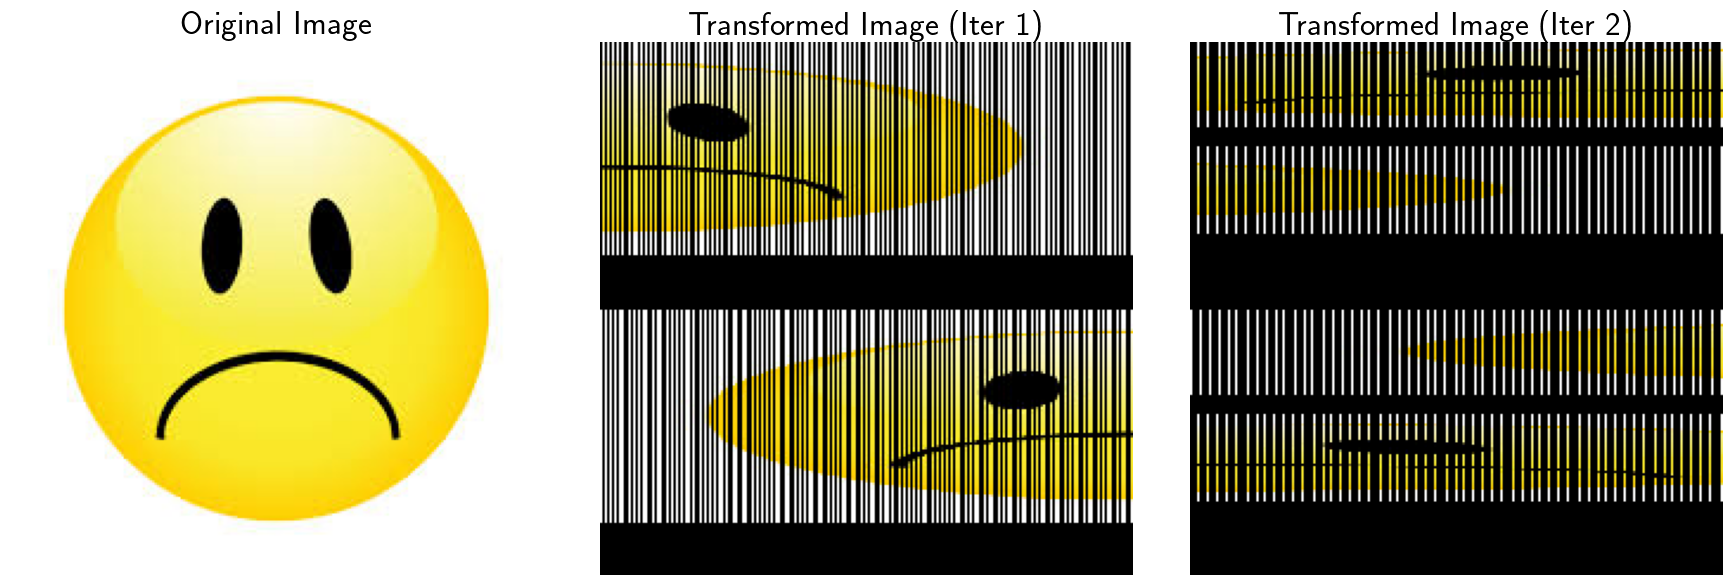

In [12]:
def transform_image(image_path, a, iterations):
    # Load the image
    image = Image.open(image_path)
    image = image.convert('RGB')  # Ensure the image is in RGB format
    width, height = image.size
    
    # Normalize the pixel coordinates to the unit square
    x_vals, y_vals = np.meshgrid(np.linspace(0, 1, width), np.linspace(0, 1, height))
    x_vals = x_vals.flatten()
    y_vals = y_vals.flatten()
    
    # Apply the Baker's Map iterations
    for _ in range(iterations):
        new_x_vals, new_y_vals = [], []
        for x, y in zip(x_vals, y_vals):
            x_new, y_new = bakers_map(x, y, a)
            new_x_vals.append(x_new)
            new_y_vals.append(y_new)
        x_vals = np.array(new_x_vals)
        y_vals = np.array(new_y_vals)
    
    # Adjust the positions
    x_vals = np.clip(x_vals * (width - 1), 0, width - 1).astype(int)
    y_vals = np.clip(y_vals * (height - 1), 0, height - 1).astype(int)
    
    # Create the transformed image
    transformed_image = Image.new('RGB', (width, height))
    pixels = transformed_image.load()
    
    # Assign pixels based on transformed coordinates
    original_pixels = image.load()
    for i in range(len(x_vals)):
        pixels[x_vals[i], y_vals[i]] = original_pixels[i % width, i // width]
    
    # Convert transformed image to numpy array for further processing
    transformed_array = np.array(transformed_image)
    
    # Split into top and bottom slices
    top_slice = transformed_array[:height // 2]
    bottom_slice = transformed_array[height // 2:]
    
    # Swap slices
    swapped_image_array = np.vstack((bottom_slice, top_slice))
    
    # Convert back to image
    swapped_image = Image.fromarray(swapped_image_array)
    
    return swapped_image

# Parameters for the Baker's map
a = 0.4
iterations = [1, 2]
image_path = 'sad.jpeg'

# Plot the original and transformed images
fig, axs = plt.subplots(1, len(iterations) + 1, figsize=(18, 6))

# Original image
original_image = Image.open(image_path)
axs[0].imshow(original_image)
axs[0].axis('off')
axs[0].set_title('Original Image')

# Transformed images
for i, itr in enumerate(iterations):
    transformed_image = transform_image(image_path, a, itr)
    axs[i + 1].imshow(transformed_image)
    axs[i + 1].axis('off')
    axs[i + 1].set_title(f'Transformed Image (Iter {itr})')

plt.tight_layout()
plt.show()

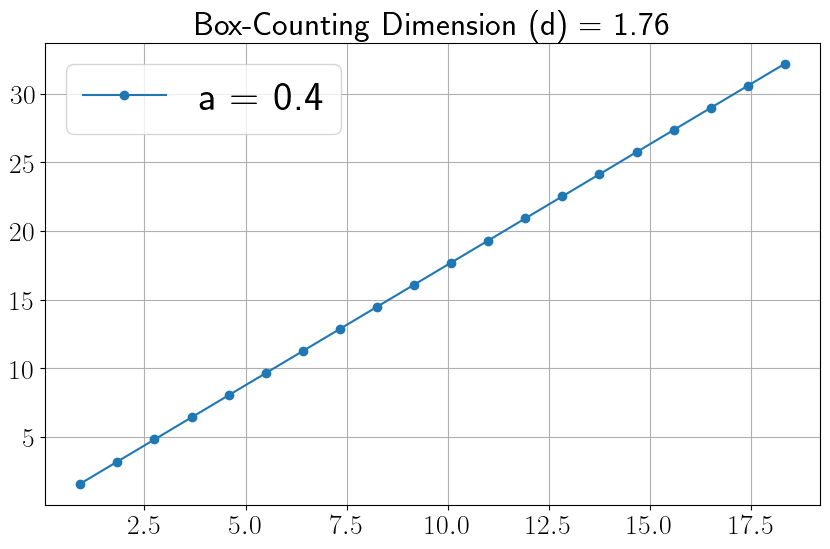

Calculated Box-Counting Dimension: 1.76


In [13]:
def calculate_box_counting_dimension(a, max_n):
    """Calculate the box-counting dimension of the Baker's map attractor."""
    n_values = np.arange(1, max_n + 1)
    epsilon_values = a ** n_values
    N_values = (a / 2) ** (-n_values)
    
    # Calculate dimension
    log_epsilon = np.log(1 / epsilon_values)
    log_N = np.log(N_values)
    dimension = 1 + np.log(1 / 2) / np.log(a)
    
    return n_values, log_epsilon, log_N, dimension

# Parameters
a = 0.4
max_n = 20

# Compute
n_values, log_epsilon, log_N, dimension = calculate_box_counting_dimension(a, max_n)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(log_epsilon, log_N, 'o-', label=f'a = {a}')

plt.title(f'Box-Counting Dimension (d) = {dimension:.2f}')
plt.legend()
plt.grid(True)
plt.show()

print(f'Calculated Box-Counting Dimension: {dimension:.2f}')

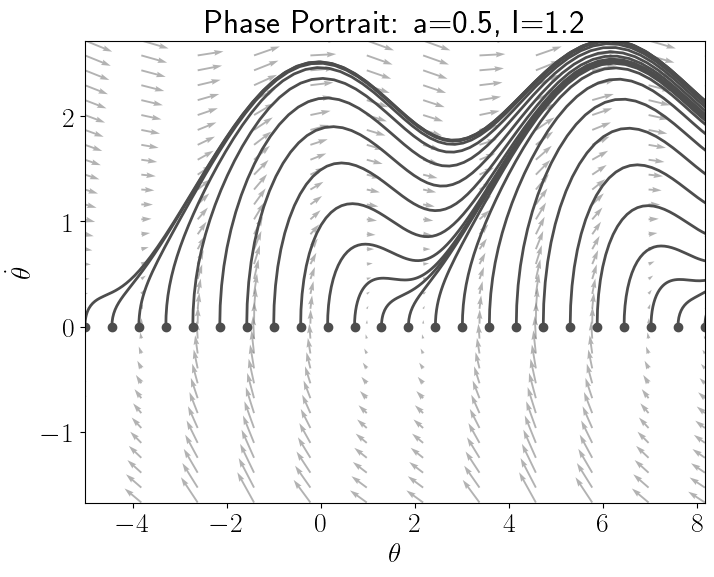

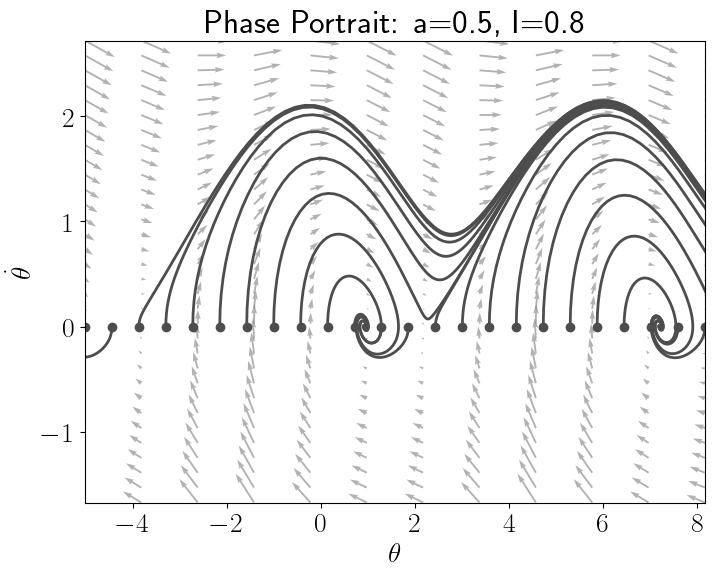

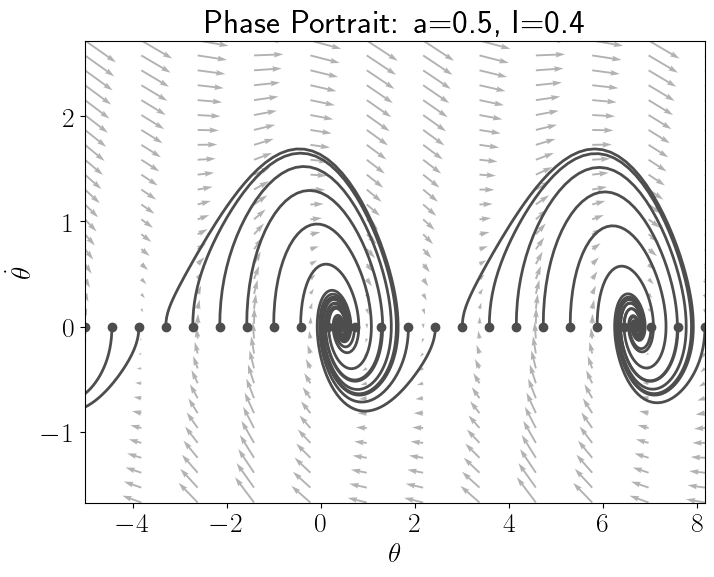

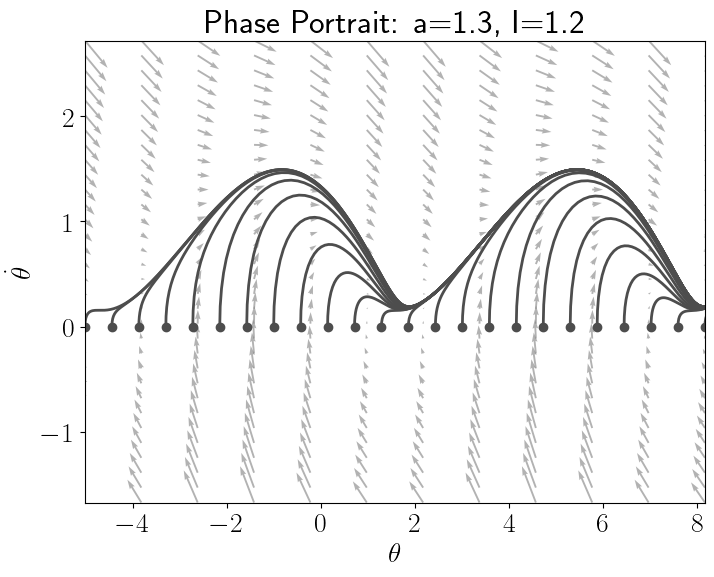

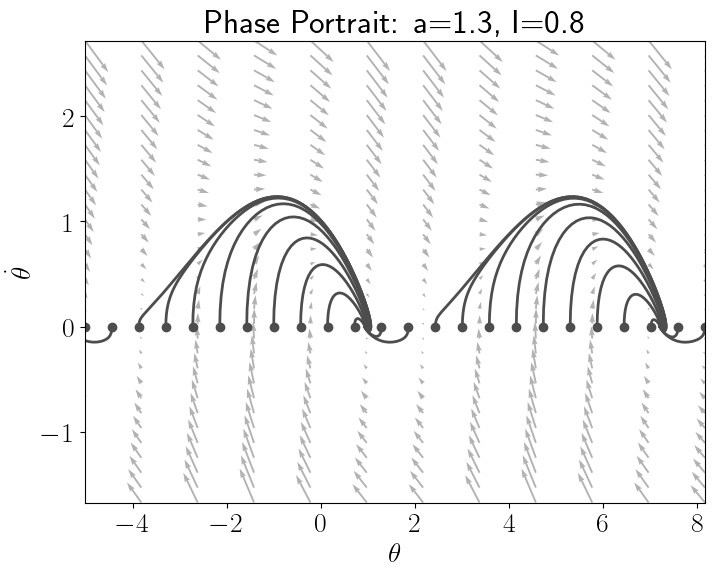

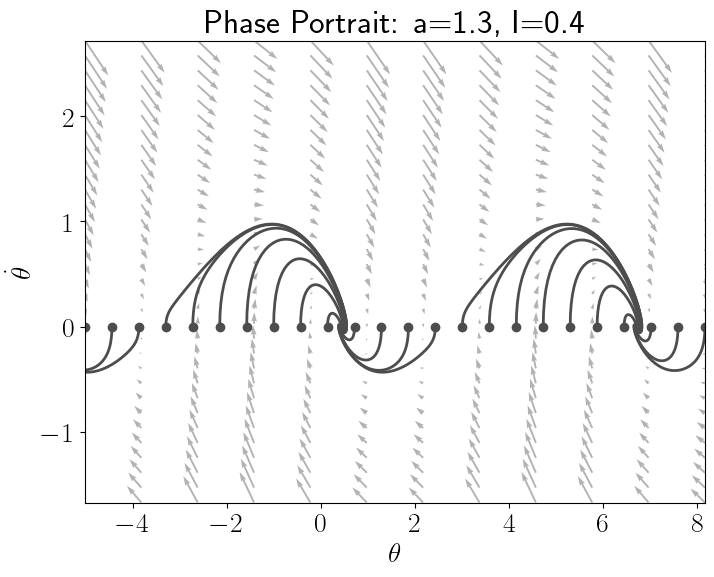

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def vector_field(x, y, dx, dy, ax):
    """ Plot vector field on the given axis. """
    ax.quiver(x, y, dx, dy, color='gray', alpha=0.6)

def custom_plot(xlim, ylim):
    """ Set up the plot with custom limits. """
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r"$\dot{\theta}$")
    return ax

def damped_driven_pendulum(v, t, alpha, I):
    """ Differential equation for the driven damped pendulum. """
    theta, theta_dot = v
    dtheta = theta_dot
    dtheta_dot = I - alpha * theta_dot - np.sin(theta)
    return [dtheta, dtheta_dot]

# Field settings
lval = [-1.6 * np.pi, 2.6 * np.pi]
x_vals = np.linspace(lval[0], lval[1], 12)
y_vals = np.linspace(lval[0] / 3, lval[1] / 3, 32)
x, y = np.meshgrid(x_vals, y_vals)

# Loop over different alpha and I values
for alpha in [0.5, 1.3]:
    for I in [1.2, 0.8, 0.4]:
        # Calculate the vector field
        dx = y
        dy = I - alpha * y - np.sin(x)
        
        # Set up the plot
        ax = custom_plot([lval[0], lval[1]], [lval[0]/3, lval[1]/3])
        vector_field(x, y, dx, dy, ax)
        
        # Numerical solutions
        ts = np.linspace(0, 18, 180)
        for startx in np.linspace(lval[0], lval[1], 24):
            starty = 0
            sol = odeint(damped_driven_pendulum, [startx, starty], ts, args=(alpha, I))
            ax.plot(sol[0, 0], sol[0, 1], 'o', color=[0.3, 0.3, 0.3])
            ax.plot(sol[:, 0], sol[:, 1], linewidth=2, color=[0.3, 0.3, 0.3])

        plt.title(f"Phase Portrait: a={alpha}, I={I}")
        plt.show()
